In [1]:
# 初期設定
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt

In [2]:
def kf_predict(x, P, u, A, Bu, B, Q):
    if u is None:
        x_new = A @ x
    else:
        x_new = A @ x + Bu @ u
    P_new = A @ P @ A.T + B @ Q @ B.T
    return x_new, P_new

In [3]:
def kf_update(x, P, y, C, R):
    S = R + C @ P @ C.T
    K = scipy.linalg.solve(S.T, C @ P, assume_a="pos").T
    # K = P@C.T@scipy.linalg.inv(S)
    x_new = x + K @ (y - C @ x)
    P_new = P - K @ C @ P
    return x_new, P_new, K

In [4]:
A = np.array([[1.0, 0], [0, 1.0]])
B = np.eye(2)
Bu = None
C = np.array([[1.0, 0], [1.0, 1.0]])
Q = np.diag([5.0, 1.0])
R = np.diag([1e2, 0.0])

N = 1000

d = np.random.normal(0, np.sqrt(5.0), (1, N))
v = np.random.normal(0, 1.0, (1, N))
w = np.random.normal(0, 10.0, (1, N))

x = np.zeros(2)
xhat = np.zeros(2)
P = np.eye(2) * 10.0

Xhat = []
Z = []
Y1 = []
Y2 = []
z = np.array([10.0])
e = np.array([5.0])

In [5]:
# システムのシミュレーションと推定
for k in range(N):
    y1 = z + w[:, k]
    y2 = z + e
    y = np.hstack([y1, y2])
    xhat, P, K = kf_update(xhat, P, y, C, R)
    Xhat.append(xhat)
    Z.append(z)
    Y1.append(y1)
    Y2.append(y2)
    z = z + 2 * np.cos(0.05 * k) + d[:, k]
    e = e + v[:, k]
    xhat, P = kf_predict(xhat, P, None, A, None, B, Q)

In [6]:
Xhat_np = np.array(Xhat)
Z_np = np.array(Z)
Y1_np = np.array(Y1)
Y2_np = np.array(Y2)

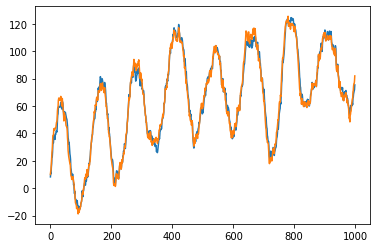

In [7]:
fig1 = plt.figure()
plt.plot(Xhat_np[:, 0])
plt.plot(Z_np)

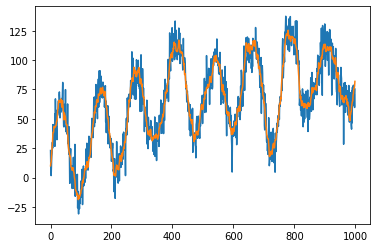

In [8]:
fig1 = plt.figure()
plt.plot(Y1_np)
plt.plot(Z_np)

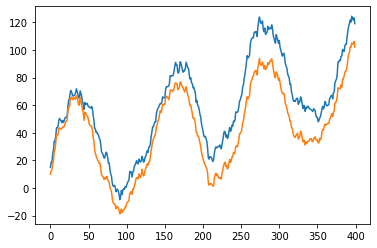

In [9]:
fig1 = plt.figure()
plt.plot(Y2_np[:400, 0])
plt.plot(Z_np[:400, 0])

In [11]:
plt.show()